## Data import and preprocessing

In [3]:
#Importing the base libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.style.use(['ggplot']) #use ggplot style

In [4]:
# Getting the raw data
df = pd.read_csv('housing.csv') # Notice: Raw data is in the Data folder
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 20640 rows and 10 columns in train


In [6]:
# As it was dsicussed in Part 1. Explanatory Data Analysis, it might be interesting to add the possibly helpful 
#attributes combinations and study their effect on modeling too

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.199211,2.172269


## Handling categorical attributes

In [7]:
# Asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean
# this gradient is chosen for the better and easier interpretation of models results (feature importances)

df.loc[df['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 4
df.loc[df['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 3
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
df.loc[df['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 1
df.loc[df['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3,4.970588,0.199211,2.172269


## Data split

Now the data will be splitted in train and test set to avoid the data leakage and bias during the further preprocessing steps, which include cleaning the missing values and feature scaling.

In [8]:
# Splitting the data into training and testing sets.
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data", len(train_set1))
print("Testing Data", len(test_set1))

Training Data 16512
Testing Data 4128


## Data cleaning on train and test

Changing the missing values with the median on a train set.

In [9]:
# Observing missing values
missing_values_count = train_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(train_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes = train_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X = imputer.transform(housing_numerical_attributes)

Percent of data that is missing: 0.15187090041741205


Changing the missing values with the median (from a train set) on a test set.

In [10]:
# Observing missing values
missing_values_count = test_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(test_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes1 = test_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X1 = imputer.transform(housing_numerical_attributes1)

Percent of data that is missing: 0.16398330351818724


In [11]:
# Data with replaced NAN values.
# Put back the ocean proximity in train set
train_set = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

train_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,3,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,3,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,1,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,2,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,2,5.894904,0.179363,2.388535
2582,-124.09,40.86,25.0,1322.0,387.0,794.0,379.0,1.1742,75000.0,4,3.488127,0.292738,2.094987
13084,-121.36,38.57,26.0,1793.0,244.0,653.0,235.0,5.6485,129500.0,1,7.629787,0.136085,2.778723
15385,-116.95,33.31,16.0,2921.0,639.0,1838.0,540.0,2.2393,117000.0,2,5.409259,0.218761,3.403704
3648,-118.46,34.23,19.0,9902.0,2814.0,7307.0,2660.0,2.5850,145400.0,2,3.722556,0.284185,2.746992
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,2,5.505618,0.193878,3.808989


In [12]:
# Data with replaced NAN values.
# Put back the ocean proximity in test set
test_set = pd.DataFrame(X1, columns = housing_numerical_attributes1.columns, index = housing_numerical_attributes1.index)

test_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,2,4.503205,0.238434,1.777244
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,1,4.988584,0.208238,2.609589
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,3,4.480296,0.225948,3.778325
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,3,3.908046,0.285294,2.298851
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,2,5.406360,0.189542,2.512367
6636,-118.16,34.15,17.0,821.0,163.0,229.0,164.0,7.3715,263000.0,2,5.006098,0.198538,1.396341
17333,-120.44,34.91,12.0,3189.0,463.0,1200.0,442.0,5.2990,226800.0,2,7.214932,0.145187,2.714932
19081,-122.48,38.31,29.0,2375.0,560.0,1124.0,502.0,2.3276,166200.0,2,4.731076,0.235789,2.239044
13298,-117.64,34.08,35.0,1254.0,241.0,729.0,253.0,3.4950,118000.0,1,4.956522,0.192185,2.881423
7157,-118.16,34.04,45.0,332.0,70.0,302.0,60.0,3.1895,156300.0,2,5.533333,0.210843,5.033333


## Feature Scaling

In [13]:
train_set_without_target = train_set.drop("median_house_value", axis=1) # drop labels for training set 
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,3,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,3,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,1,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,2,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,2,5.894904,0.179363,2.388535
2582,-124.09,40.86,25.0,1322.0,387.0,794.0,379.0,1.1742,4,3.488127,0.292738,2.094987
13084,-121.36,38.57,26.0,1793.0,244.0,653.0,235.0,5.6485,1,7.629787,0.136085,2.778723
15385,-116.95,33.31,16.0,2921.0,639.0,1838.0,540.0,2.2393,2,5.409259,0.218761,3.403704
3648,-118.46,34.23,19.0,9902.0,2814.0,7307.0,2660.0,2.5850,2,3.722556,0.284185,2.746992
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,2,5.505618,0.193878,3.808989


In [14]:
test_set_without_target = test_set.drop("median_house_value", axis=1) # drop labels for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,2,4.503205,0.238434,1.777244
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,1,4.988584,0.208238,2.609589
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,3,4.480296,0.225948,3.778325
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,3,3.908046,0.285294,2.298851
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,2,5.406360,0.189542,2.512367
6636,-118.16,34.15,17.0,821.0,163.0,229.0,164.0,7.3715,2,5.006098,0.198538,1.396341
17333,-120.44,34.91,12.0,3189.0,463.0,1200.0,442.0,5.2990,2,7.214932,0.145187,2.714932
19081,-122.48,38.31,29.0,2375.0,560.0,1124.0,502.0,2.3276,2,4.731076,0.235789,2.239044
13298,-117.64,34.08,35.0,1254.0,241.0,729.0,253.0,3.4950,1,4.956522,0.192185,2.881423
7157,-118.16,34.04,45.0,332.0,70.0,302.0,60.0,3.1895,2,5.533333,0.210843,5.033333


In [15]:
# Creating pandas series full of zeros to store the standard deviation and the mean from the training set.
std_dev_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")
mean_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")

# Getting the values for the mean and standard deviation from the training dataset.
for col in train_set_without_target.columns:
    std_dev_tr[col]= train_set_without_target[col].std()
    mean_tr[col]= train_set_without_target[col].mean()
    # Changing the training data so it is normalized with the mean and standard deviation from the training set.
    train_set_without_target[col]=(train_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

for col in test_set_without_target.columns:
    # Changing the testing data so it is normalized with the mean and standard deviation from the training set.
    test_set_without_target[col]=(test_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

In [16]:
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.056550,-0.625594,1.524846,-0.044352
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.056550,0.173618,-0.579347,-0.060913
2582,-2.249334,2.446229,-0.286386,-0.605393,-0.360489,-0.561738,-0.317942,-1.428406,2.004703,-0.747204,1.365437,-0.086225
13084,-0.889486,1.374677,-0.206933,-0.388983,-0.701829,-0.687210,-0.694472,0.936967,-1.087176,0.837377,-1.321708,-0.027269
15385,1.307191,-1.086617,-1.001464,0.129299,0.241033,0.367288,0.103040,-0.865333,-0.056550,-0.012187,0.096468,0.026621
3648,0.555041,-0.656124,-0.763105,3.336857,5.432740,5.234000,5.646399,-0.682576,-0.056550,-0.657512,1.218719,-0.030005
11159,0.779191,-0.847974,0.190332,-0.312251,-0.377198,-0.061630,-0.378082,0.098516,-0.056550,0.024679,-0.330364,0.061567


In [17]:
train_set_without_target.insert(12,"median_house_value",train_set["median_house_value"]) #Put back the target values for train set
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901,255600.0
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455,114600.0
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553,137500.0
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.056550,-0.625594,1.524846,-0.044352,118800.0
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.056550,0.173618,-0.579347,-0.060913,422700.0
2582,-2.249334,2.446229,-0.286386,-0.605393,-0.360489,-0.561738,-0.317942,-1.428406,2.004703,-0.747204,1.365437,-0.086225,75000.0
13084,-0.889486,1.374677,-0.206933,-0.388983,-0.701829,-0.687210,-0.694472,0.936967,-1.087176,0.837377,-1.321708,-0.027269,129500.0
15385,1.307191,-1.086617,-1.001464,0.129299,0.241033,0.367288,0.103040,-0.865333,-0.056550,-0.012187,0.096468,0.026621,117000.0
3648,0.555041,-0.656124,-0.763105,3.336857,5.432740,5.234000,5.646399,-0.682576,-0.056550,-0.657512,1.218719,-0.030005,145400.0
11159,0.779191,-0.847974,0.190332,-0.312251,-0.377198,-0.061630,-0.378082,0.098516,-0.056550,0.024679,-0.330364,0.061567,225900.0


In [18]:
train=train_set_without_target
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901,255600.0
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455,114600.0
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553,137500.0
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.056550,-0.625594,1.524846,-0.044352,118800.0
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.056550,0.173618,-0.579347,-0.060913,422700.0
2582,-2.249334,2.446229,-0.286386,-0.605393,-0.360489,-0.561738,-0.317942,-1.428406,2.004703,-0.747204,1.365437,-0.086225,75000.0
13084,-0.889486,1.374677,-0.206933,-0.388983,-0.701829,-0.687210,-0.694472,0.936967,-1.087176,0.837377,-1.321708,-0.027269,129500.0
15385,1.307191,-1.086617,-1.001464,0.129299,0.241033,0.367288,0.103040,-0.865333,-0.056550,-0.012187,0.096468,0.026621,117000.0
3648,0.555041,-0.656124,-0.763105,3.336857,5.432740,5.234000,5.646399,-0.682576,-0.056550,-0.657512,1.218719,-0.030005,145400.0
11159,0.779191,-0.847974,0.190332,-0.312251,-0.377198,-0.061630,-0.378082,0.098516,-0.056550,0.024679,-0.330364,0.061567,225900.0


In [19]:
test_set_without_target.insert(12,"median_house_value",test_set["median_house_value"]) #Put back the target values for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.056550,-0.358840,0.433935,-0.113623,355000.0
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853,70700.0
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923,229400.0
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646,112500.0
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.056550,-0.013297,-0.404725,-0.050236,225400.0
6636,0.704475,-0.693558,-0.922011,-0.835587,-0.895175,-1.064516,-0.880122,1.847844,-0.056550,-0.166435,-0.250415,-0.146466,263000.0
17333,-0.431222,-0.337934,-1.319276,0.252437,-0.179078,-0.200450,-0.153210,0.752201,-0.056550,0.678655,-1.165581,-0.032769,226800.0
19081,-1.447372,1.253017,0.031426,-0.121571,0.052460,-0.268080,0.003678,-0.818652,-0.056550,-0.271657,0.388569,-0.073803,166200.0
13298,0.963493,-0.726313,0.508145,-0.636637,-0.708990,-0.619580,-0.647406,-0.201497,-1.087176,-0.185403,-0.359397,-0.018413,118000.0
7157,0.704475,-0.745030,1.302675,-1.060268,-1.117166,-0.999555,-1.152060,-0.363002,-0.056550,0.035283,-0.039342,0.167138,156300.0


In [20]:
test=test_set_without_target
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.056550,-0.358840,0.433935,-0.113623,355000.0
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853,70700.0
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923,229400.0
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646,112500.0
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.056550,-0.013297,-0.404725,-0.050236,225400.0
6636,0.704475,-0.693558,-0.922011,-0.835587,-0.895175,-1.064516,-0.880122,1.847844,-0.056550,-0.166435,-0.250415,-0.146466,263000.0
17333,-0.431222,-0.337934,-1.319276,0.252437,-0.179078,-0.200450,-0.153210,0.752201,-0.056550,0.678655,-1.165581,-0.032769,226800.0
19081,-1.447372,1.253017,0.031426,-0.121571,0.052460,-0.268080,0.003678,-0.818652,-0.056550,-0.271657,0.388569,-0.073803,166200.0
13298,0.963493,-0.726313,0.508145,-0.636637,-0.708990,-0.619580,-0.647406,-0.201497,-1.087176,-0.185403,-0.359397,-0.018413,118000.0
7157,0.704475,-0.745030,1.302675,-1.060268,-1.117166,-0.999555,-1.152060,-0.363002,-0.056550,0.035283,-0.039342,0.167138,156300.0


## Modeling

In [21]:
# First, we will split between features and target value (labels) for train set

housing = train.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train["median_house_value"].copy()

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.056550,-0.625594,1.524846,-0.044352
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.056550,0.173618,-0.579347,-0.060913
2582,-2.249334,2.446229,-0.286386,-0.605393,-0.360489,-0.561738,-0.317942,-1.428406,2.004703,-0.747204,1.365437,-0.086225
13084,-0.889486,1.374677,-0.206933,-0.388983,-0.701829,-0.687210,-0.694472,0.936967,-1.087176,0.837377,-1.321708,-0.027269
15385,1.307191,-1.086617,-1.001464,0.129299,0.241033,0.367288,0.103040,-0.865333,-0.056550,-0.012187,0.096468,0.026621
3648,0.555041,-0.656124,-0.763105,3.336857,5.432740,5.234000,5.646399,-0.682576,-0.056550,-0.657512,1.218719,-0.030005
11159,0.779191,-0.847974,0.190332,-0.312251,-0.377198,-0.061630,-0.378082,0.098516,-0.056550,0.024679,-0.330364,0.061567


In [22]:
housing_labels

15961    255600.0
1771     114600.0
16414    137500.0
5056     118800.0
8589     422700.0
2582      75000.0
13084    129500.0
15385    117000.0
3648     145400.0
11159    225900.0
14015    289600.0
16022    394100.0
5728     500001.0
8640     434500.0
9059     119600.0
2186      70800.0
8171     256300.0
16596    294000.0
18238    175000.0
18109    400700.0
13235    395500.0
5794     258300.0
15824    300000.0
11860     75000.0
7878     239700.0
1117      93400.0
17922    240000.0
16700    143600.0
14852    136300.0
9632      97500.0
           ...   
3606     239900.0
19261    147900.0
4415     189400.0
1031      68900.0
6285     181000.0
1110     107700.0
18272    500001.0
11742    193100.0
17137    410200.0
19433    129100.0
16946    500001.0
4764     157000.0
19946     54600.0
8444     227800.0
18900     93800.0
2962     175000.0
12645     66800.0
3462     194100.0
10989    252800.0
7751     161200.0
16332    130800.0
20609     57500.0
144      233100.0
19279    146000.0
7813     1

In [23]:
# Second, we will split between features and target value (labels) for test set

housing_t = test.drop("median_house_value", axis=1) # drop labels for test set
housing_labels_t = test["median_house_value"].copy()

housing_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.056550,-0.358840,0.433935,-0.113623
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.056550,-0.013297,-0.404725,-0.050236
6636,0.704475,-0.693558,-0.922011,-0.835587,-0.895175,-1.064516,-0.880122,1.847844,-0.056550,-0.166435,-0.250415,-0.146466
17333,-0.431222,-0.337934,-1.319276,0.252437,-0.179078,-0.200450,-0.153210,0.752201,-0.056550,0.678655,-1.165581,-0.032769
19081,-1.447372,1.253017,0.031426,-0.121571,0.052460,-0.268080,0.003678,-0.818652,-0.056550,-0.271657,0.388569,-0.073803
13298,0.963493,-0.726313,0.508145,-0.636637,-0.708990,-0.619580,-0.647406,-0.201497,-1.087176,-0.185403,-0.359397,-0.018413
7157,0.704475,-0.745030,1.302675,-1.060268,-1.117166,-0.999555,-1.152060,-0.363002,-0.056550,0.035283,-0.039342,0.167138


In [24]:
housing_labels_t

4712     355000.0
2151      70700.0
15927    229400.0
82       112500.0
8161     225400.0
6636     263000.0
17333    226800.0
19081    166200.0
13298    118000.0
7157     156300.0
15734    293800.0
12388     97500.0
13589     63500.0
3403     314900.0
11888     92400.0
7385     117200.0
18378    485000.0
6104     141900.0
6881     188500.0
16035    228600.0
18836     71200.0
9694     108500.0
16297     56400.0
15020    174400.0
14928    245200.0
9474      92600.0
19710    102400.0
391      256100.0
516      471600.0
12380    122500.0
           ...   
6039     119400.0
11684    268100.0
14368    388300.0
16849    324700.0
19642    181300.0
10817    271600.0
428      259600.0
14165    167600.0
4563     131300.0
20578    275000.0
15272    338700.0
18922    219700.0
6389     500001.0
20003     71300.0
14431    193800.0
7492      90600.0
16101    260800.0
11597    342700.0
3565     221900.0
6863     268400.0
10506    315500.0
604      195700.0
10251    171700.0
11371    229600.0
7485     1

### Random Forest

In [25]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf=RandomForestRegressor()
rf_model=rf.fit(housing, housing_labels)

C:\Users\isifl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
rf_model.score(housing_t, housing_labels_t)

0.7902589167163746

In [28]:
# Prediction using the testing dataset.
housing_labels_prediction=rf_model.predict(housing_t)

## Evaluating the error

In [29]:
# First import what is needed to evaluate the error.
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [30]:
# Getting the Mean Absolute Error
MAE= mean_absolute_error(housing_labels_prediction,housing_labels_t)
# # Getting the Mean Squared Error
MSE= mean_squared_error(housing_labels_prediction,housing_labels_t)
# Displaying the obtained values for the errors.
print("MAE is: ", MAE, "MSE is: " ,MSE)
# Because the values of MSE are squared, the square root is taken to facilitate the understanding of the value. This way the RMSE is obtained.
# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE is: ", RMSE)

MAE is:  33987.70460271318 MSE is:  2751154584.6186147
RMSE is:  52451.44978566955


In [31]:
import sklearn
# Options for scoring.
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [40]:
# Using cross_val_score with MSE for capped data.

from sklearn.model_selection import cross_val_score
# What do I put for scoring? Did the rest also use cv=10?

neg_scores_capped=cross_val_score(rf,housing, housing_labels,scoring="neg_mean_squared_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
# Also, because is the Mean SQUARED Error, I used the square root.
scores_capped_MSE=np.sqrt(-(neg_scores_capped))
print("scores: ", scores_capped_MSE)
print("scores mean: ", scores_capped_MSE.mean())
print("scores standard deviation: ", scores_capped_MSE.std())

scores:  [53469.25978824 51853.94273752 51356.50373048 53485.90467946
 52049.37784978 54353.28013633 49453.00907452 54433.91018646
 51286.27616495 52248.68890823]
scores mean:  52399.01532559762
scores standard deviation:  1474.1987634671234


In [41]:
# Using cross_val_score with MAE for uncapped data.

# What do I put for scoring? Did the rest also use cv=10?

neg_scores_capped=cross_val_score(rf,housing, housing_labels,scoring="neg_mean_absolute_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
scores_capped_MAE=(-(neg_scores_capped))
print("scores: ", scores_capped_MAE)
print("scores mean: ", scores_capped_MAE.mean())
print("scores standard deviation: ", scores_capped_MAE.std())

scores:  [34612.22590799 34826.66386199 34233.42768019 34792.42016959
 33341.42392489 36304.4308298  32902.91926105 35832.33967293
 34526.97407632 33498.36523319]
scores mean:  34487.11906179467
scores standard deviation:  1010.0633615625324


## Tunning

In [42]:
# Tune model with GridSearchCV:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_search = GridSearchCV(rf, param_grid, cv=5,
 scoring='neg_mean_squared_error', # results change when this is MAE
return_train_score=True)
grid_search.fit(housing, housing_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [43]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [46]:
final_model_capped=grid_search.best_estimator_

In [48]:
final_predictions_capped=final_model_capped.predict(housing_t)

In [49]:
# Getting the Mean Absolute Error
MAE_final= mean_absolute_error(final_predictions_capped,housing_labels_t)
# # Getting the Mean Squared Error
MSE_final= mean_squared_error(final_predictions_capped,housing_labels_t)
# Displaying the obtained values for the errors.
print("MAE is: ", MAE_final, "MSE is: " ,MSE_final)
# Because the values of MSE are squared, the square root is taken to facilitate the understanding of the value. This way the RMSE is obtained.
# Root Mean Squared Error
RMSE_final=np.sqrt(MSE_final)
print("RMSE is: ", RMSE_final)

MAE is:  32609.440826873382 MSE is:  2460756913.06114
RMSE is:  49606.016903810574


In [55]:
rf_best_model=final_model_capped.fit(housing, housing_labels)
rf_best_model.score(housing_t, housing_labels_t)

0.8127665756581506

In [58]:
# Using cross_val_score with MAE for capped data.

# What do I put for scoring? Did the rest also use cv=10?

neg_scores_capped=cross_val_score(final_model_uncapped,housing, housing_labels,scoring="neg_mean_absolute_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
final_scores_capped_MAE=(-(neg_scores_capped))
print("scores: ", final_scores_capped_MAE)
print("scores mean: ", final_scores_capped_MAE.mean())
print("scores standard deviation: ", final_scores_capped_MAE.std())

scores:  [32664.86828087 32849.47629136 31821.63454472 32136.52453059
 31981.95229154 33988.90121139 31506.68562487 33260.98118312
 33235.42475268 33177.69178276]
scores mean:  32662.41404938993
scores standard deviation:  743.5662630407635


In [61]:
# Using cross_val_score with MSE for capped data.

from sklearn.model_selection import cross_val_score
# What do I put for scoring? Did the rest also use cv=10?

neg_scores_capped=cross_val_score(final_model_capped,housing, housing_labels,scoring="neg_mean_squared_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
# Also, because is the Mean SQUARED Error, I used the square root.
final_scores_capped_MSE=np.sqrt(-(neg_scores_capped))
print("scores: ", final_scores_capped_MSE)
print("scores mean: ", final_scores_capped_MSE.mean())
print("scores standard deviation: ", final_scores_capped_MSE.std())

scores:  [50576.78997564 49317.08910138 47965.89036249 49418.3645493
 49234.69838888 51320.52911822 47491.29588198 50387.80565938
 50831.62601453 50750.27792352]
scores mean:  49729.43669753163
scores standard deviation:  1207.0999486294656


## Feature Importance

In [51]:
# Feature importances.
features=housing.columns
importances=final_model_uncapped.feature_importances_
# Display features and their importances better using pandas.
combined=pd.Series(importances, features)
combined

longitude                   0.069692
latitude                    0.062937
housing_median_age          0.043590
total_rooms                 0.014913
total_bedrooms              0.014504
population                  0.015153
households                  0.014065
median_income               0.377524
ocean_proximity             0.169605
rooms_per_household         0.047826
bedrooms_per_room           0.061488
population_per_household    0.108701
dtype: float64

In [52]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

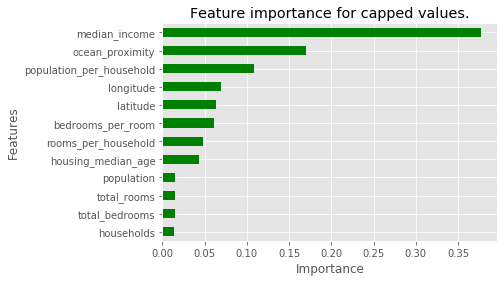

In [54]:
figure()
# Creating a horizontal graph with the values from the pandas Series.
combined.sort_values().plot.barh(color="green")
plt.title("Feature importance for capped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()